In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("Advertising.csv")

In [4]:
X = df.drop('sales',axis=1)
y= df['sales']
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [5]:
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)


In [6]:
polynomial_converter.fit(X)

PolynomialFeatures(include_bias=False)

In [7]:
poly_features = polynomial_converter.transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)

In [9]:
y.shape

(200,)

In [10]:
model = LinearRegression()

In [11]:
model.fit(X=X_train,y=y_train)

LinearRegression()

In [12]:
test_predictions = model.predict(X_test)

In [13]:
test_predictions

array([13.94856153, 19.33480262, 12.31928162, 16.76286337,  7.90210901,
        6.94143792, 20.13372693, 17.50092709, 10.56889   , 20.12551788,
        9.44614537, 14.09935417, 12.05513493, 23.39254049, 19.67508393,
        9.15626258, 12.1163732 ,  9.28149557,  8.44604007, 21.65588129,
        7.05070331, 19.35854208, 27.26716369, 24.58689346,  9.03179421,
       11.81070232, 20.42630125,  9.19390639, 12.74795186,  8.64340674,
        8.66294151, 20.20047377, 10.93673817,  6.84639129, 18.27939359,
        9.47659449, 10.34242145,  9.6657038 ,  7.43347915, 11.03561332,
       12.65731013, 10.65459946, 11.20971496,  7.46199023, 11.38224982,
       10.27331262,  6.15573251, 15.50893362, 13.36092889, 22.71839277,
       10.40389682, 13.21622701, 14.23622207, 11.8723677 , 11.68463616,
        5.62217738, 25.03778913,  9.53507734, 17.37926571, 15.7534364 ])

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
MAE = mean_absolute_error(y_test,test_predictions)

In [16]:
MSE = mean_squared_error(y_test,test_predictions)

In [17]:
RMSE = np.sqrt(MSE)

In [18]:
MAE

0.48967980448035603

In [19]:
RMSE

0.6646431757269019

In [20]:
model.coef_

array([ 5.17095811e-02,  1.30848864e-02,  1.20000085e-02, -1.10892474e-04,
        1.14212673e-03, -5.24100082e-05,  3.34919737e-05,  1.46380310e-04,
       -3.04715806e-05])

In [21]:
test_residuals = y_test -test_predictions

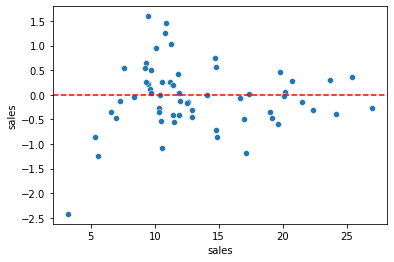

In [22]:
sns.scatterplot(x=y_test,y=test_residuals,)
plt.axhline(y=0,color='red',ls='--')

<AxesSubplot:xlabel='sales', ylabel='Count'>

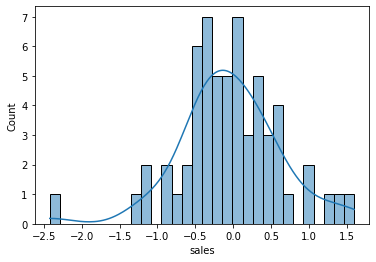

In [23]:
sns.histplot(x=test_residuals,bins=30,kde=True)

In [24]:
# create the different order polynomial

In [25]:
# split the new features

In [26]:
# fit on train

In [27]:
#save the rmse for both train and test

In [28]:
#plot the results (error vs poly order)

In [29]:
train_rmse_errors = []
test_rmse_errors = []
for d in range(1,10):
    
    poly_converter = PolynomialFeatures(degree=d,include_bias=False)
    poly_features= poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)
    
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_rmse = np.sqrt(mean_squared_error(y_train,train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test,test_pred))
    
    train_rmse_errors.append(train_rmse)
    test_rmse_errors.append(test_rmse)
    

In [30]:
train_rmse_errors

[1.734594124329376,
 0.5879574085292231,
 0.43393443569020657,
 0.3517083688399348,
 0.2509342962728227,
 0.1994556133865361,
 5.418481285535737,
 0.1508621033579802,
 0.17175170448632276]

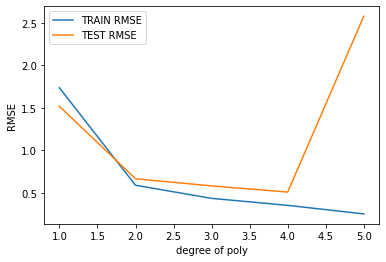

In [38]:
plt.plot(range(1,6),train_rmse_errors[:5],label='TRAIN RMSE')
plt.plot(range(1,6),test_rmse_errors[:5],label='TEST RMSE')
plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()

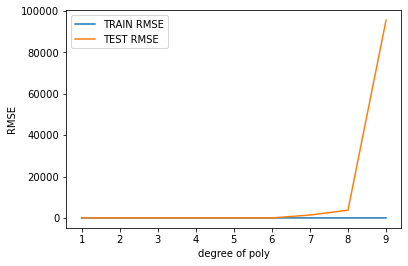

In [39]:
plt.plot(range(1,10),train_rmse_errors,label='TRAIN RMSE')
plt.plot(range(1,10),test_rmse_errors,label='TEST RMSE')
plt.xlabel('degree of poly')
plt.ylabel('RMSE')
plt.legend()
#the sudden burst on 8th degree 

In [40]:
final_poly_converter = PolynomialFeatures(degree=3,include_bias=False)

In [42]:
final_model = LinearRegression()

In [48]:
final_poly_features =final_poly_converter.fit_transform(X)

In [50]:
final_model = LinearRegression()
final_model.fit(final_poly_features,y)

LinearRegression()

In [51]:
from joblib import dump,load
dump(final_model,'final_poly_model.joblib')
dump(final_poly_converter,'final_poly_converter.joblib')

['final_poly_converter.joblib']